# TEST

In [1]:
# Imports 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import codecs
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# Read in Files (Complete)
import os 

ppath = '/home/lucas/Cloud/code-projects/Machine-Learning-OReilly/classification/spam_dataset' 

spam_files = os.listdir('/home/lucas/Cloud/code-projects/Machine-Learning-OReilly/classification/spam_dataset/spam')
ham_files = os.listdir('/home/lucas/Cloud/code-projects/Machine-Learning-OReilly/classification/spam_dataset/ham')

print("Detected:\n", len(spam_files), ' Spam Files\n', len(ham_files), " Ham Files")


# Spam: Reading Files to String
spam_raw = []
for file in spam_files:
    temp = codecs.open(ppath+'/spam/'+file, 'r', encoding='utf-8', errors='ignore').read()
    spam_raw.append(temp)

# Ham: Reading Files to String 
ham_raw = []
for file in ham_files:
    temp = codecs.open(ppath+'/ham/'+file, 'r', encoding='utf-8', errors='ignore').read()
    ham_raw.append(temp)

print("Strings Loaded:\n", len(spam_raw), " Spam Files\n", len(ham_raw), " Ham Files")

Detected:
 501  Spam Files
 2501  Ham Files


Strings Loaded:
 501  Spam Files
 2501  Ham Files


In [3]:
# Text Cleaner Functions (Complete)

import re
import email
import mailparser
# import lxml.html as lxml


IGNORED_CHARACTERS = ".,<>[]()=:;-/!@#$%^&*()_\\+\"*@'"


def remove_characters(text):
    for c in IGNORED_CHARACTERS:
        text = text.replace(c, "")
    return text


def hyper_links(text):
    result = re.findall(r'\b(?:https?|telnet|gopher|file|wais|ftp):[\w/#~:.?+=&%@!\-.:?\\-]+?(?=[.:?\-]*(?:[^\w/#~:.?+=&%@!\-.:?\-]|$))', text)
    return result


def remove_links(text):
    result = re.sub(r'\b(?:https?|telnet|gopher|file|wais|ftp):[\w/#~:.?+=&%@!\-.:?\\-]+?(?=[.:?\-]*(?:[^\w/#~:.?+=&%@!\-.:?\-]|$))',"" ,text)
    return result


def payload(text):
    mail = mailparser.parse_from_string(text)
    
    return mail.body


def get_payload(text):
    result = ""
    msg = email.message_from_string(text)
    if msg.is_multipart():
        return msg.get_payload(0, decode=False).__str__()
    else:
        return msg.get_payload(None, decode=False).__str__()


def clean_html(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext


# def word_count(text):
#     word_count = dict()
#     for word in text.split():
#         if word in word_count:
#             word_count[word] += 1
#         else:
#             word_count[word] = 1
#     return word_count


result_string = ham_raw[2476]
result_string = get_payload(result_string)
result_string = remove_links(result_string)
result_string = clean_html(result_string)
result_string = remove_characters(result_string)
print(result_string)


ContentType textplain charsetiso88591
ContentDisposition inline
ContentTransferEncoding 7bit

To view this newsletter in fullcolor


Media Unspun
What the Press is Reporting and Why wwwmediaunspuncom

October 8 2002


IN THIS ISSUE

 BUSH COVERS THE WATERFRONT
 THE BIGGEST CABLE HOOKUP


EDITORS NOTE

Is Media Unspun useful to you? Then pass it on to a colleague
The more readers we have the more successful well be The more 
successful we are the more useful we can be to you Pass it
on

Media Unspun serves business news and analysis authoritatively
and irreverently every business day An annual subscription
costs 50 less than a dollar a week If your fourweek free
trial is coming to an end soon please visit
 and sign up via credit card 
or check



ADVERTISEMENT

PopTech 2002
October 18  20 2002 Camden Maine
Join 500 big thinkers to discuss
the collision of technology and culture
Register now at 



BUSH COVERS THE WATERFRONT

It may seem like all Iraq all the time in the Oval Office but


In [4]:
# Text Cleaner (Complete)

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, toLowerCase=False, removeLinks=True, cleanHTML=True):
        self.toLowerCase = toLowerCase
        self.removeLinks = removeLinks
        self.cleanHTML = cleanHTML
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        result = []
        for text in X:
            temp = get_payload(text)
            if self.removeLinks:
                temp = remove_links(temp)
            if self.cleanHTML:
                temp = clean_html(temp)
            if self.removeLinks:
                temp = remove_characters(temp)
            if self.toLowerCase:
                temp = temp[:].lower()
            result.append(temp)
        return result
    
    
cleaner = TextCleaner(toLowerCase=True, removeLinks=False)
cleaned_spam = cleaner.transform(spam_raw)
cleaned_ham = cleaner.transform(ham_raw)

print(cleaned_ham[2476])

content-type: text/plain; charset="iso-8859-1"
content-disposition: inline
content-transfer-encoding: 7bit

to view this newsletter in full-color:
http://newsletter.mediaunspun.com/index000021410.cfm

media unspun
what the press is reporting and why (www.mediaunspun.com)
-----------------------------------------------------------------
october 8, 2002

-----------------------------------------------------------------
in this issue
-----------------------------------------------------------------
* bush covers the waterfront
* the biggest cable hookup

-----------------------------------------------------------------
editor's note
-----------------------------------------------------------------
is media unspun useful to you? then pass it on to a colleague.
the more readers we have, the more successful we'll be. the more 
successful we are, the more useful we can be to you. pass it
on!

media unspun serves business news and analysis, authoritatively
and irreverently, every business day.

In [5]:
# Word Occurance Analysis

from collections import OrderedDict
from operator import itemgetter


def subtract_dicts(dict1, dict2):
    size_factor = len(dict1) / len(dict2)
    result = OrderedDict(dict1)
    for element in dict2.keys():
        if element in result.keys():
            result[element] = dict1.get(element, 0) - dict2.get(element, 0) * size_factor
        else:
            result[element] = 0
            
    dict1 = OrderedDict(sorted(result.items(), key=itemgetter(1), reverse=True))
    return result
    

# Most Used Words
def count_words_in_string(text):
    result = OrderedDict()
    for word in text.split():
        if word in result:
            result[word] = result[word] + 1
        else:
            result[word] = 1  
    return result

def filter_words(words):
    filtered_words = []
    for word_el in words:
        if len(word_el) < 15 and len(word_el) > 2:
            filtered_words.append(word_el)
    return filtered_words


spam_words = OrderedDict()
ham_words = OrderedDict()



for elem in cleaned_spam:
    spam_words.update(count_words_in_string(elem))

for elem in cleaned_ham:
    ham_words.update(count_words_in_string(elem))
    

spam_words = OrderedDict(sorted(spam_words.items(), key=itemgetter(1), reverse=True))
ham_words = OrderedDict(sorted(ham_words.items(), key=itemgetter(1), reverse=True))



result = OrderedDict()
result = subtract_dicts(spam_words, ham_words)
result = filter_words(list(result.keys()))


word_vector_labels = list(result)

print(word_vector_labels[:50])

['<option', 'kingdom', 'enenkio', 'islands', 'marshall', 'u.s.', 'king', 'atoll', 'grants', 'guide', 'contains', 'eneen-kio', 'the', 'wake', 'name', 'les', 'marshallese', 'pour', 'enenkio,', 'shangrila', 'zowie', 'botanical', 'wowie', 'atoll,', 'ratak', 'hermios', 'send', 'hermios,', 'emails', 'value=3d=', 'northern', 'majesty', 'murjel', 'guides', 'address', '\\tab', 'iroijlaplap', 'oz.', 'nation', 'rmi', '(tm)', 'jurisdiction', 'vous', 'internal', 'color=red><img', 'monarch', 'atolls', 'moore', 'intro', 'kathmandu']


In [6]:
# Transformer

from collections import Counter


class Categorizer(BaseEstimator, TransformerMixin):
    def __init__(self, spam=1):
        self.spam = spam
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        link_count = []
        label = []
        for elem in X:
            link_count.append(len(hyper_links(elem)))
            label.append(self.spam)
        d = {'label': label, 'link_count': link_count}
        result = pd.DataFrame(data=d, dtype=np.int)
        return result
            
            
class WordCounter(BaseEstimator, TransformerMixin):
    def __init__(self, key_words):
        self.key_words = key_words
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        tmp = []
        for text in X:
            for k_word in self.key_words:
                tmp.append(len(re.findall(k_word, text)))
        return np.array(tmp).reshape(len(X), len(self.key_words))
    

# cat = Categorizer()
# attributes_spam = cat.fit_transform(spam_raw)
cat = Categorizer(spam=0)
attributes_ham = cat.fit_transform(ham_raw)

counter = WordCounter(key_words=word_vector_labels)
# np.set_printoptions(threshold=np.nan)
# print(counter.fit_transform(spam_raw))

# words_spam = pd.DataFrame(counter.fit_transform(spam_raw))
words_ham = pd.DataFrame(counter.fit_transform(ham_raw))

# df_spam = pd.concat([attributes_spam, words_spam], axis=1, sort=False)
df_ham = pd.concat([attributes_ham, words_ham], axis=1, sort=False)

# print(df_ham)

# combine = pd.concat([df_spam, df_ham], axis=0)

# print(df_ham)
  # Base Attributes
base_attribute_cat = Categorizer(spam=0)
base_attributes = base_attribute_cat.fit_transform(X=ham_raw, y=None)
# Word Analysis
counter = WordCounter(key_words=word_vector_labels)
words = pd.DataFrame(counter.fit_transform(ham_raw), dtype=np.int)

# Combiner
data_frame= pd.concat([base_attributes, words], axis=1, sort=False)
# print(data_frame)

error: missing ), unterminated subpattern at position 0

In [12]:
# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion

class DataFrameGenerator(BaseEstimator, TransformerMixin):
    
    def __init__(self, key_words_count=20, key_words=None, link_count=True, label=None):
        self.key_words_count = key_words_count  # How many Keywords will get used
        self.link_count = link_count  # Count of Links in Text as Attribute
        self.key_words = key_words  # List of Words that get used as key words
        self.label = label  # Label that gets assigned to each element in the DF
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Base Attributes
        base_attribute_cat = Categorizer(spam=self.label)
        base_attributes = base_attribute_cat.fit_transform(X=X, y=None)
        
        cleaner = TextCleaner(cleanHTML=False)
        X = cleaner.fit_transform(X)
        # Word Analysis
        counter = WordCounter(key_words=self.key_words[:self.key_words_count])
        words = pd.DataFrame(counter.fit_transform(X=X, y=None))

        # Combiner
        data_frame = pd.concat([base_attributes, words], axis=1, sort=False)
        return data_frame
        
        
        
spam_processing_pipeline = Pipeline([
    ('text_processor', TextCleaner(removeLinks=False)),
    ('df_generator', DataFrameGenerator(key_words_count=20, key_words=word_vector_labels, label=1, 
                                        link_count=True))
])

        
ham_processing_pipeline = Pipeline([
    ('text_processor', TextCleaner(removeLinks=False)),
    ('df_generator', DataFrameGenerator(key_words_count=20, key_words=word_vector_labels, label=0, 
                                        link_count=True))
])


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes='label'):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if(self.attributes == 'label'):
            return X.iloc[:, 0].values
        if(self.attributes == 'attributes'):
            return X.iloc[:, 1:].values


class FrameCombiner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        pass
        
        
spam_data = spam_processing_pipeline.fit_transform(spam_raw)

ham_data = ham_processing_pipeline.fit_transform(ham_raw)


data = pd.concat([spam_data, ham_data])

print(data.shape)
print(len(word_vector_labels))

(3002, 22)
59706


In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.utils import shuffle


data_rand = shuffle(data)


svm = svm.SVC(kernel='linear',C = 200)

classifier = SGDClassifier(random_state=20, max_iter=5)
    
data_selector = DataFrameSelector(attributes='attributes')
label_selector = DataFrameSelector(attributes='label')

training_data = data_selector.fit_transform(data_rand)[:2000]
training_labels = label_selector.fit_transform(data_rand)[:2000]

# print(training_labels)

classifier.fit(training_data, training_labels)
svm.fit(training_data, training_labels)




/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [ ]:
testing_data = data_selector.fit_transform(data_rand)[2000:]
testing_labels = label_selector.fit_transform(data_rand)[2000:]

# predictions = classifier.predict(testing_data)
predictions = svm.predict(testing_data)

print("P= ", predictions)
print("L= ", testing_labels)

P=  [0 0 0 ... 0 0 0]
L=  [0 0 0 ... 0 1 0]


/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-pack

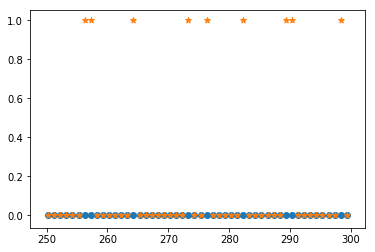

2
168
1002


In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, testing_data, testing_labels, cv=3, scoring='accuracy')


x = np.linspace(0, len(predictions), len(predictions))
# print(len(x), len(predictions))
test = [predictions, testing_labels]

min, max = 250, 300

plt.scatter(x[min:max], predictions[min:max])
plt.scatter(x[min:max], testing_labels[min:max], marker='*')

plt.show()

correct = 0
total = 0


for i in range(len(predictions)):
    if testing_labels[i] == 1:
        total += 1
        if predictions[i] == testing_labels[i]:
            correct += 1

print(correct)
print(total)
print(len(predictions))

In [ ]:
from sklearn.metrics import f1_score

conf_mtrx = f1_score(predictions, testing_labels)

print(conf_mtrx)

0.023529411764705882
